In [51]:
# Importing useful libraries
import numpy as np  # linear algebra
import pandas as pd  # data processing
import re  # pattern searching in a string
import matplotlib.dates as mdates  # for date formatting on plots
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')  # seaborn style



In [52]:
# upload the dataset and 'transaction_date' column as a date
data_22 = pd.read_csv('/kaggle/input/retail-store/data_csv/data_2022.csv', parse_dates=['transaction_date'], date_format='%Y-%m-%d')

# replace infinite values with NaN
data_22.replace([np.inf, -np.inf], np.nan, inplace=True)


# check missing values
data_22.fillna(0, inplace=True)

# cleaning columns that aren't useful
data_22.drop(columns=['Unnamed: 0', 'extra_column_if_any'], errors='ignore', inplace=True)

# transaction_date is correct
data_22['transaction_date'] = pd.to_datetime(data_22['transaction_date'], errors='coerce')

# check for duplicates 
data_22.drop_duplicates(inplace=True)

# group by 'inventory_category' count
count_by_categories = data_22.groupby('inventory_category').size().reset_index(name='count')

# 5 sample of the data
print(count_by_categories.sample(5))

# sort by count to find top categories
sorted_by_count = count_by_categories.sort_values('count', ascending=False)

# the top 10 categories by product count
print("Top 10 Inventory Categories by Product Count:")
print(sorted_by_count.head(10))


                           inventory_category  count
15822          MSH ITMSH02156 Slim SS Olive L      2
3520         BSH ITBSH01121 Regular LS Blue S     53
16845           MSH ITMSH02954 Slim LS Mint L      1
37612  MTS ITMTS01201 Regular SS Blu Bonnet M    137
27601     MSO ITMSO00224 Slim 5P Dark Wash 32      4
Top 10 Inventory Categories by Product Count:
                                inventory_category   count
8432   CTrims ITCBM00003 NA NA White ``10x4x14````  234221
0                                                0  148749
8429          CBG ITCBR00001 NA NA White 12x4x16``   91543
39047                                       SHirts   61253
39068          TBG ITPTB00011 NA NA Black 46x25x26   32911
39069           TBG ITPTB00012 NA NA Black 22x7x27   25184
8448                             EB GV 500 JAN2022    8869
8430         CBG ITCBS00002 NA NA White 8x3x11.5``    7623
39064          TBG ITPTB00007 NA NA Grey (22x15x6)    6414
39070          TBG ITPTB00013 NA NA Black 41x2

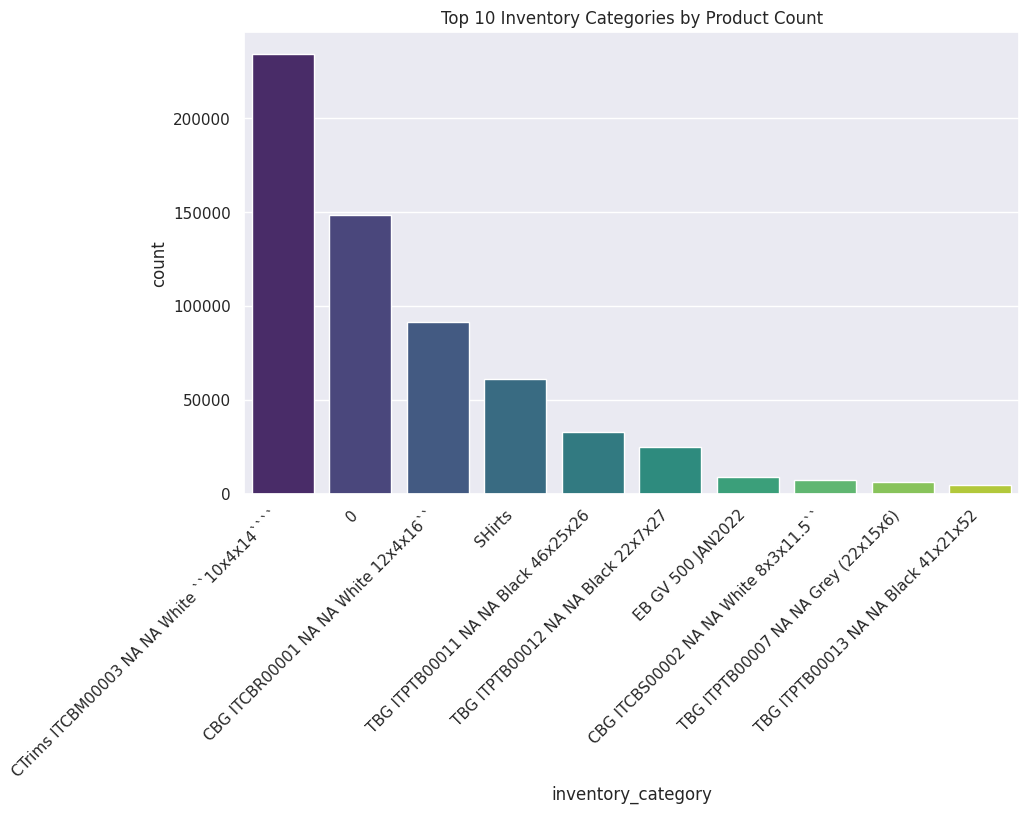

In [53]:
# top 10 categories as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_by_count.head(10), x='inventory_category', y='count', palette='viridis')
plt.title('Top 10 Inventory Categories by Product Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# the number of products sold per day
grouped_by_date = data_22.groupby('transaction_date').size().reset_index(name='sold_product_count')

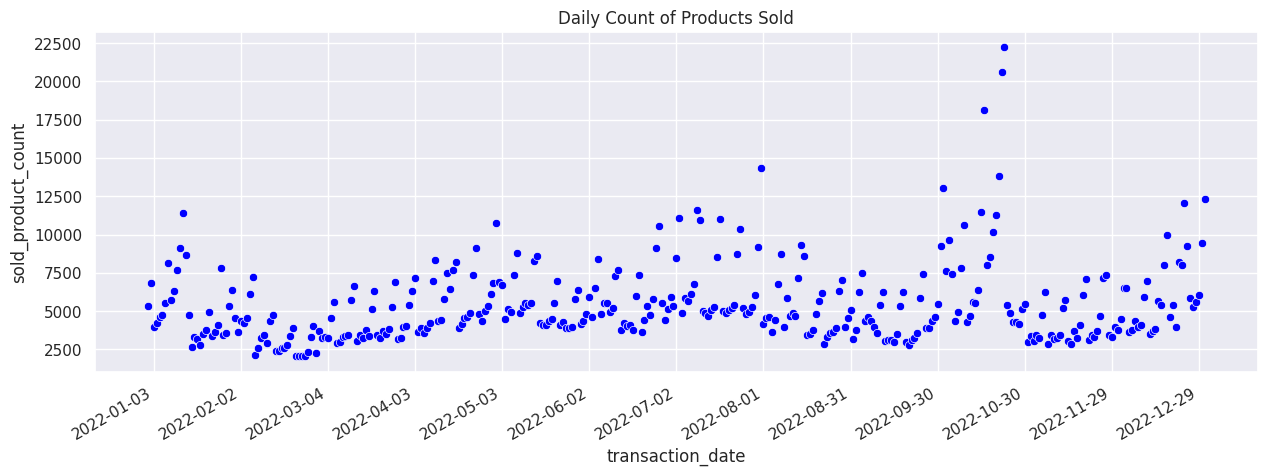

In [54]:
# scatter plot chart of products sold per day
plt.figure(figsize=(15, 5))
sns.scatterplot(data=grouped_by_date, x='transaction_date', y='sold_product_count', color='blue')
plt.title('Daily Count of Products Sold')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format x-axis for dates
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))  # Show every 30 days
plt.gcf().autofmt_xdate()  # Rotate and format date labels for readability
plt.show()

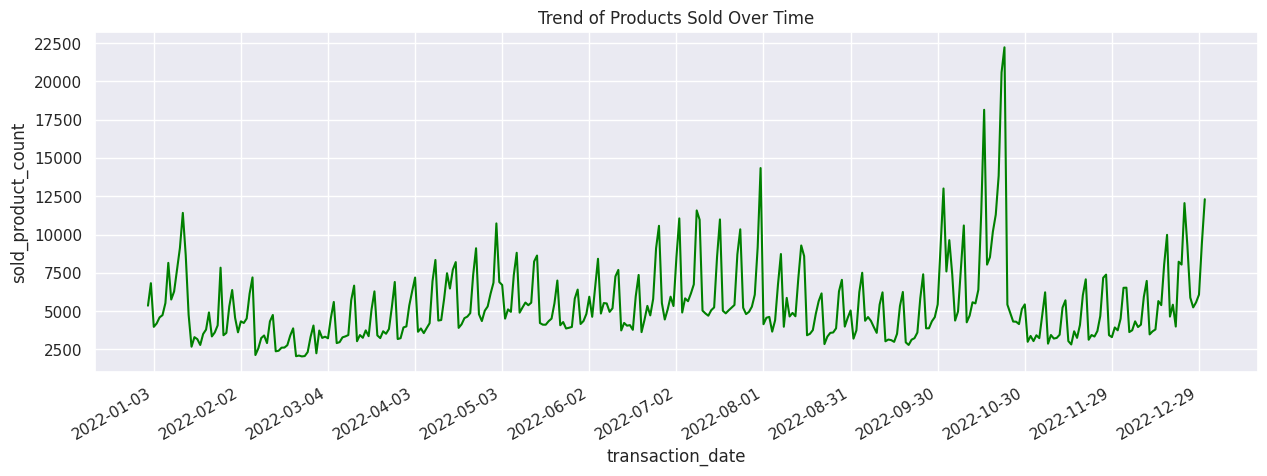

In [55]:
# line plot for a clearer 'sales trend visualization
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')
plt.figure(figsize=(15, 5))
sns.lineplot(data=grouped_by_date, x='transaction_date', y='sold_product_count', color='green')
plt.title('Trend of Products Sold Over Time')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()
plt.show()


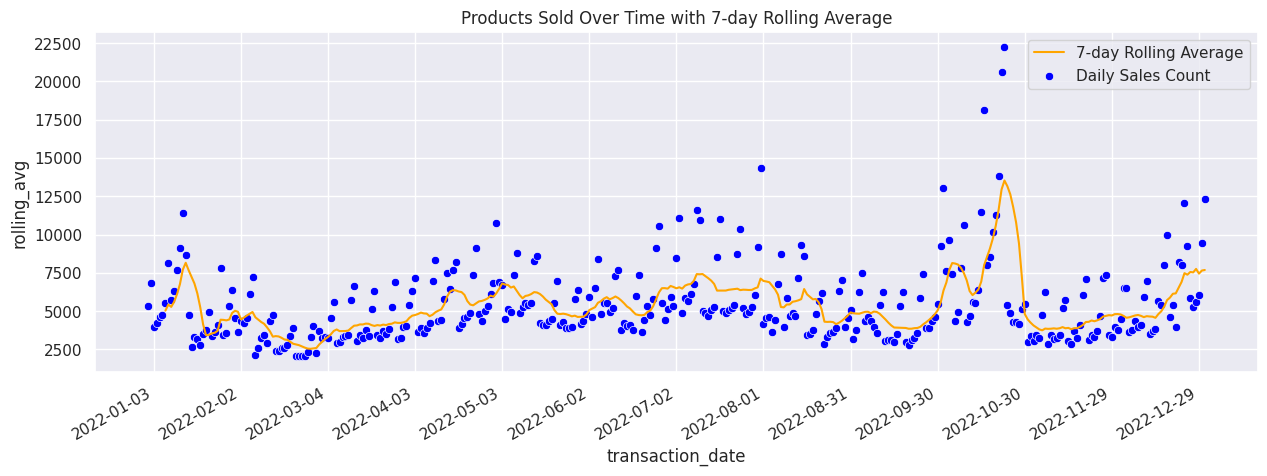

In [56]:
# calculate a 7-day rolling average for 'smoother trends'
grouped_by_date['rolling_avg'] = grouped_by_date['sold_product_count'].rolling(window=7).mean()

# the 7-day rolling average with daily sales
plt.figure(figsize=(15, 5))
sns.lineplot(data=grouped_by_date, x='transaction_date', y='rolling_avg', label='7-day Rolling Average', color='orange')
sns.scatterplot(data=grouped_by_date, x='transaction_date', y='sold_product_count', color='blue', label='Daily Sales Count')
plt.title('Products Sold Over Time with 7-day Rolling Average')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()